In [1]:
## Abstractions
import numpy as np
import pandas as pd

## Plotting
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import pylab as pl

## Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Models
from sklearn.linear_model import LogisticRegression

## Model Selection
from sklearn.model_selection import GridSearchCV

## Timing
import time

In [2]:
headers = ['molecule_name', 'conformation_name']
for i in range(1, 167):
    name = 'f%i' % i
    headers.append(name)
headers.append('class')

In [3]:
# headers = pd.read_csv('clean2.info')
df = pd.read_csv('src/clean2.data')
df.columns = headers

In [4]:
df.apply(lambda x: [min(x), max(x)])

,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,MUSK-211,192_1+1,-31,-199,-167,-114,-118,-183,-171,-225,...,-328,-219,-136,-120,-69,73,-289,-428,-471,0.0
1,NON-MUSK-jp13,jp13_2+9,292,95,81,161,325,200,220,320,...,94,179,192,411,355,625,295,168,367,1.0


In [5]:
sc = MinMaxScaler()
X_std = sc.fit_transform(df.iloc[:,2:-1])
y = df.iloc[:,-1]
X_std = pd.DataFrame(X_std, columns=headers[2:-1])
X_std

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,0.222910,0.037415,0.088710,0.494545,0.002257,0.462141,0.583120,0.099083,0.525510,0.359768,...,0.054726,0.637441,0.545226,0.573171,0.419962,0.483491,0.173913,0.390411,0.489933,0.656325
1,0.238390,0.017007,0.088710,0.516364,0.002257,0.668407,0.583120,0.104587,0.525510,0.510638,...,0.047264,0.459716,0.163317,0.588415,0.495292,0.497642,0.166667,0.380137,0.474832,0.608592
2,0.222910,0.037415,0.088710,0.494545,0.002257,0.459530,0.583120,0.100917,0.525510,0.361702,...,0.052239,0.635071,0.540201,0.573171,0.421846,0.483491,0.172101,0.392123,0.491611,0.657518
3,0.222910,0.037415,0.088710,0.494545,0.002257,0.459530,0.583120,0.100917,0.525510,0.361702,...,0.052239,0.635071,0.540201,0.573171,0.421846,0.485849,0.172101,0.392123,0.491611,0.657518
4,0.238390,0.017007,0.088710,0.516364,0.002257,0.665796,0.583120,0.104587,0.525510,0.510638,...,0.044776,0.450237,0.158291,0.585366,0.495292,0.497642,0.164855,0.380137,0.474832,0.609785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6592,0.253870,0.258503,0.580645,0.021818,0.002257,0.827676,0.028133,0.563303,0.038265,0.499033,...,0.793532,0.620853,0.962312,0.371951,0.171375,0.415094,0.177536,0.419521,0.525168,0.702864
6593,0.232198,0.323129,0.596774,0.032727,0.002257,0.848564,0.015345,0.537615,0.051020,0.491296,...,0.788557,0.656398,0.967337,0.387195,0.508475,0.466981,0.153986,0.381849,0.476510,0.556086
6594,0.232198,0.329932,0.596774,0.036364,0.002257,0.665796,0.015345,0.532110,0.066327,0.529981,...,0.077114,0.990521,0.844221,0.390244,0.508475,0.469340,0.155797,0.381849,0.476510,0.554893
6595,0.253870,0.265306,0.580645,0.029091,0.002257,0.642298,0.025575,0.557798,0.053571,0.495164,...,0.047264,0.981043,0.798995,0.371951,0.167608,0.412736,0.177536,0.419521,0.523490,0.701671


In [6]:
X_std.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
count,6597.000000,6597.000000,6597.000000,6597.000000,6597.000000,6597.000000,6597.000000,6597.000000,6597.000000,6597.000000,...,6597.000000,6597.000000,6597.000000,6597.000000,6597.000000,6597.000000,6597.000000,6597.000000,6597.000000,6597.000000
mean,0.278474,0.271666,0.378433,0.412298,0.032660,0.525731,0.401236,0.409479,0.405574,0.467112,...,0.114501,0.339385,0.359761,0.335134,0.347685,0.426971,0.233274,0.413548,0.465997,0.611888
std,0.164869,0.308912,0.274037,0.292532,0.145355,0.210441,0.294943,0.165795,0.276354,0.139443,...,0.208249,0.255491,0.321259,0.212600,0.189961,0.171793,0.107842,0.094304,0.127556,0.112316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.210526,0.020408,0.120968,0.160000,0.002257,0.404700,0.030691,0.256881,0.071429,0.365571,...,0.042289,0.132701,0.035176,0.201220,0.192090,0.330189,0.168478,0.378425,0.417785,0.551313
50%,0.232198,0.170068,0.274194,0.323636,0.002257,0.563969,0.506394,0.447706,0.522959,0.497099,...,0.052239,0.222749,0.221106,0.350610,0.342750,0.415094,0.213768,0.392123,0.466443,0.594272
75%,0.260062,0.353741,0.596774,0.567273,0.004515,0.671018,0.583120,0.524771,0.571429,0.560928,...,0.064677,0.587678,0.680905,0.442073,0.506591,0.466981,0.257246,0.417808,0.516779,0.704057
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


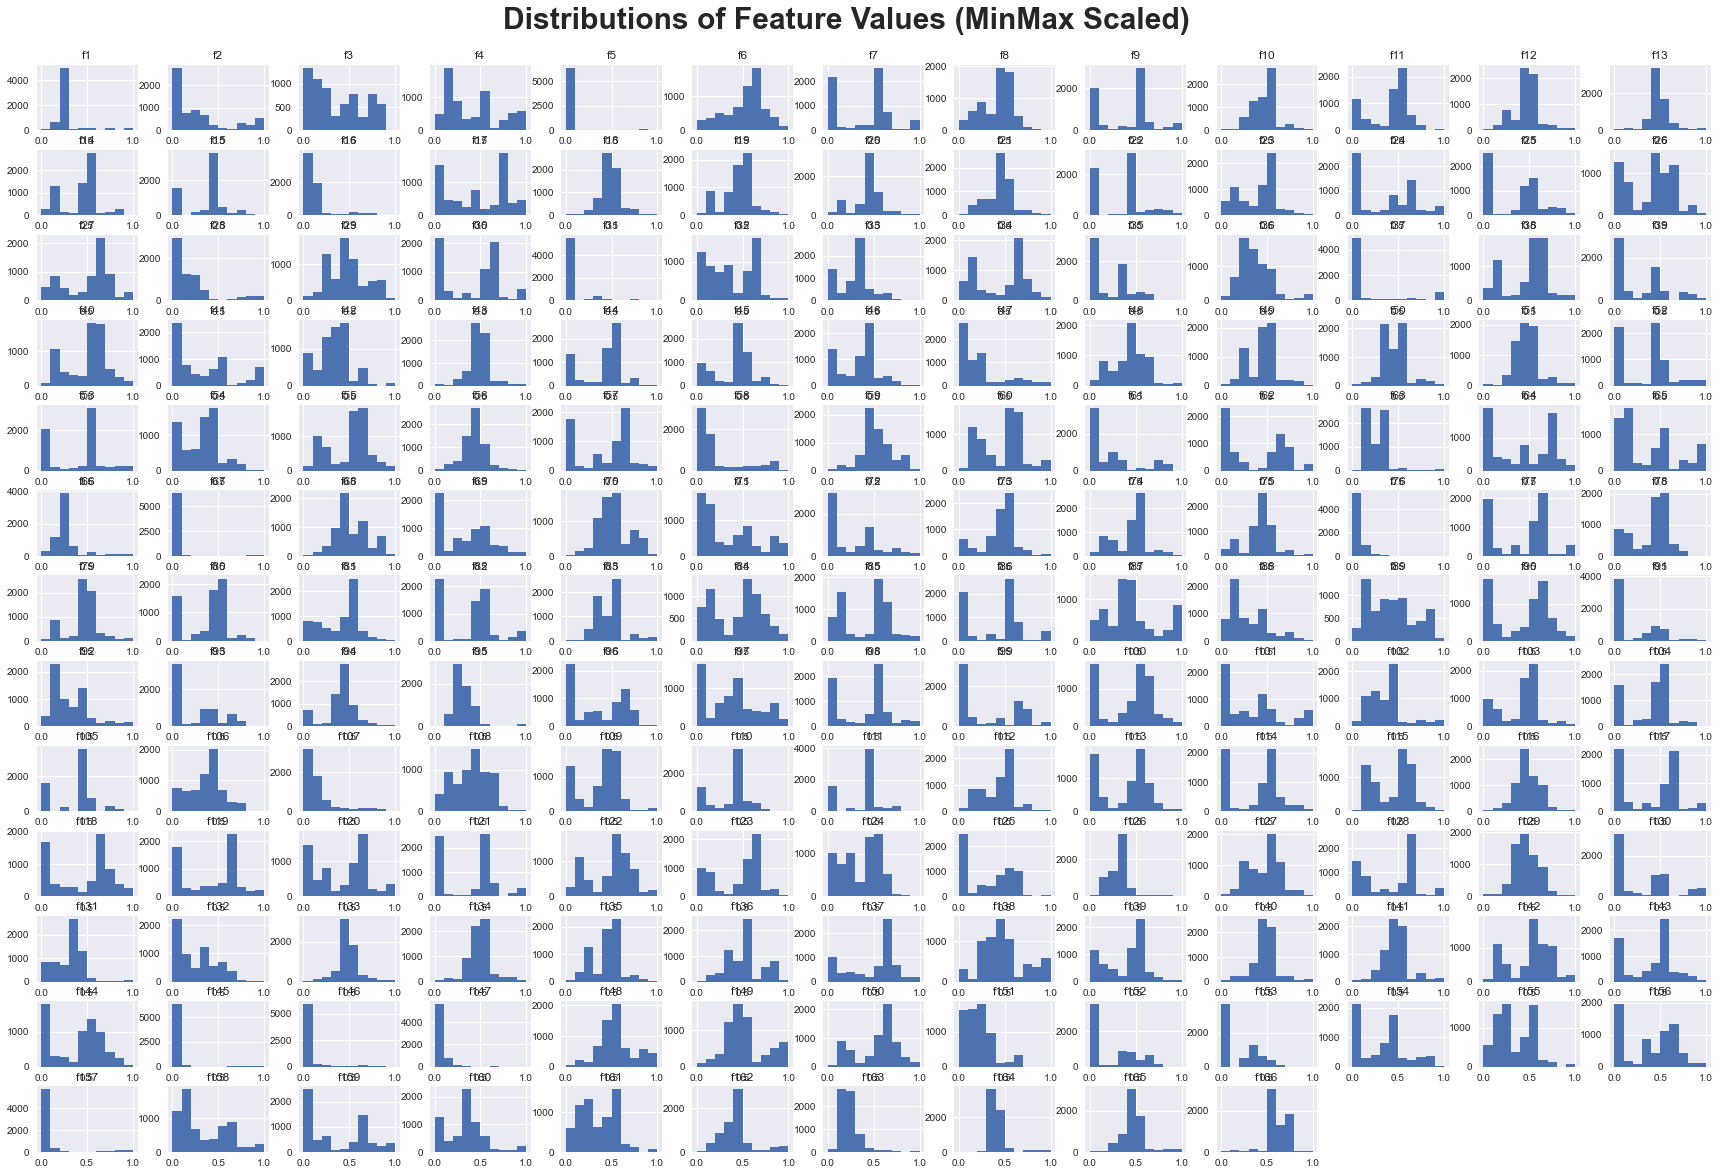

In [42]:
hist = X_std.hist(figsize=(30,20))
# ax = X_std.plot(kind='hist',subplots=True,sharex=False,sharey=False,title='My title')
# plt.title('Correlation Matrix', fontsize=20);
# plt.title('My title')
# plt.xlabel('categories')
# plt.ylabel('values')
# plt.show()
plt.suptitle("Distributions of Feature Values (MinMax Scaled)", y = 0.92, size = 30, fontweight='bold')
plt.savefig('all_distributions.jpg')

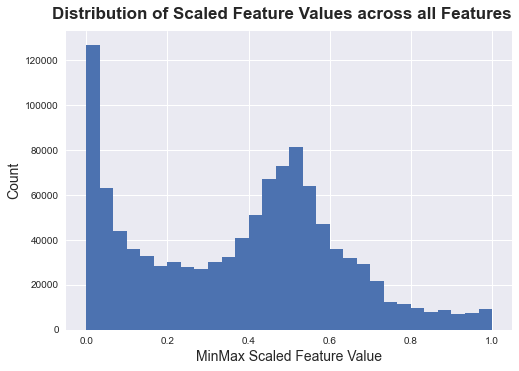

In [40]:
X_std.unstack().hist(bins = 30)
plt.suptitle("Distribution of Scaled Feature Values across all Features", y = 0.94, size = 17, fontweight='bold')
plt.ylabel('Count', size=14)
plt.xlabel('MinMax Scaled Feature Value', size=14)
plt.savefig('scaled_feature_values.jpg')

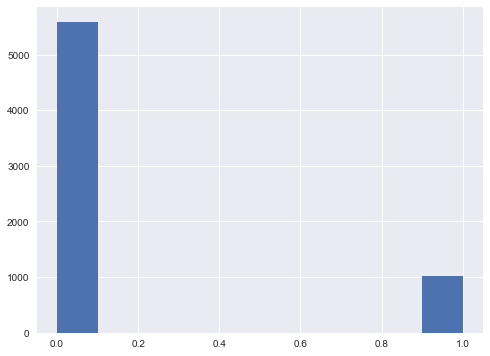

In [9]:
hist = y.hist(figsize=(8,6))

# Hypotheses (1/2 - 2/3 pages)
## Responsible: Alex and Nate (after Analysis)
1. Can we think about feature selection?
    - PCA analysis?
2. Does using imablanced learning help out predictions?
3. If we move from first order to second order gradient descent, does that imporve the computational time of learning
    - This is for both MLE and MAP
    
**TODO:** rephrase and finalize hypotheses
    
### Notes:
- Reference specific model/learning method properties and dataset properties
- Describe how to measure performance to come to conclusion
- May want to consider doing some statistical significance testing

# Part 1: Analysis (2.5 pages of writing)
- 3-4 graphs
     - 1-2 paragraphs per graph
- Description of trends: 2 paragraphs
**TODO**: All steps

## Step 1: Produce some marginal distributions of each feature in the dataset
### Responsible: Alex
- We'll pick a few and just do those sthat represent everything
- Showing the histograms of the features (done)
    - We can show the entire set of histograms
    - Describe which are unimodal, bimodal, etc.

- Highly positively correlated: f30, f128
- Highly negatively correlated: f153, f25
- Highly uncorrelated: f141 , f102

Plot of all selected feature histograms

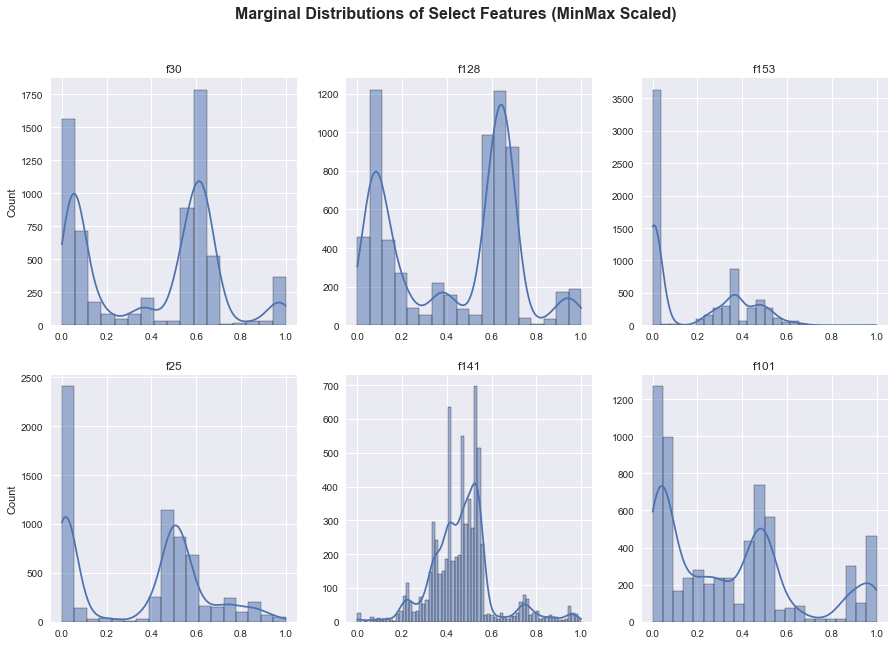

In [34]:
features = [['f30', 'f128', 'f153'], ['f25', 'f141', 'f101']]
fig, axs = plt.subplots(2,3, figsize=(15,10))
for r in range(2):
    for c in range(3):
        sns.histplot(ax=axs[r,c], data=X_std, x=features[r][c], kde=True)
        axs[r,c].set_title(features[r][c])
        axs[r,c].set_xlabel("")
        if r!=0 and c!=0 or r!=1 and c!=0:
            axs[r,c].set_ylabel("")
plt.suptitle('Marginal Distributions of Select Features (MinMax Scaled)', fontsize=16, fontweight='bold')
plt.savefig('select_marginals.jpg')

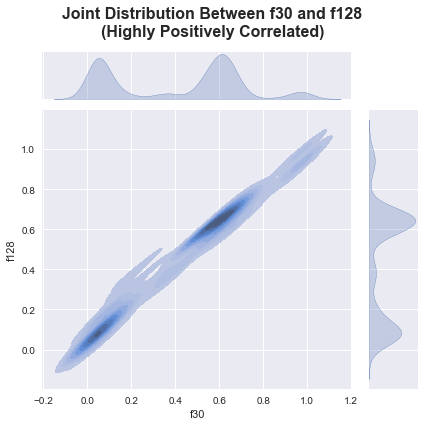

In [31]:
sns.jointplot(data=X_std, x="f30", y="f128", kind="kde", fill=True)
plt.suptitle('Joint Distribution Between f30 and f128\n(Highly Positively Correlated)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('joint_marginals_high_corr.jpg')

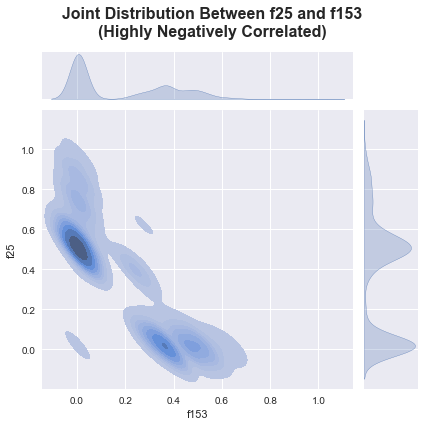

In [32]:
sns.jointplot(data=X_std, x="f153", y="f25", kind="kde", fill=True)
plt.suptitle('Joint Distribution Between f25 and f153\n(Highly Negatively Correlated)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('joint_marginals_neg_corr.jpg')

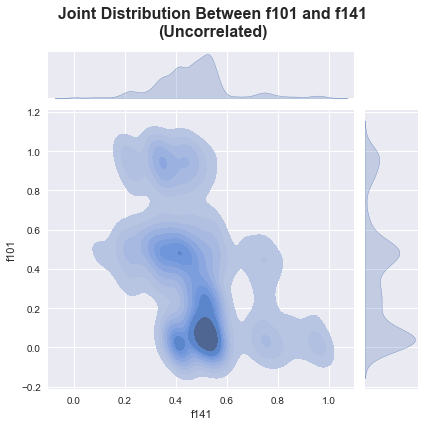

In [33]:
sns.jointplot(data=X_std, x="f141", y="f101", kind="kde", fill=True)
plt.suptitle('Joint Distribution Between f101 and f141\n(Uncorrelated)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('joint_marginals_un_corr.jpg')

## Step 2: Distribution of the outcome
### Responsible: Nate
- Is that applicable?
- Our output is binary and be imbalanced
- again show the histogram and discuss how we think the imbalance might affect learning and how using imbalanced learning techniques might improve our predictions (could be a second hypothesis)

## Step 3: Missing Data
- No missing data

## Step 4: Correlations between features and/or between features and output class
## Responsible:
- Nate (features and features)
- Alex (features and output)

In [ ]:
X_std_y = X_std.copy()
X_std_y['class'] = y
corr = X_std_y.corr()
corr

In [ ]:
corr_stacked = corr.stack().reset_index()
corr_stacked.columns = ['feature_1', 'feature_2', 'corr_coef']
corr_sorted = corr_stacked.sort_values(by='corr_coef')
corr_sorted = corr_sorted[corr_sorted['corr_coef']!=1]
corr_sorted

In [ ]:
uncorr = corr_sorted[abs(corr_sorted['corr_coef']) < 0.0001]
uncorr

In [ ]:
class_correlation = X_std_y.corr()['class']
class_correlation

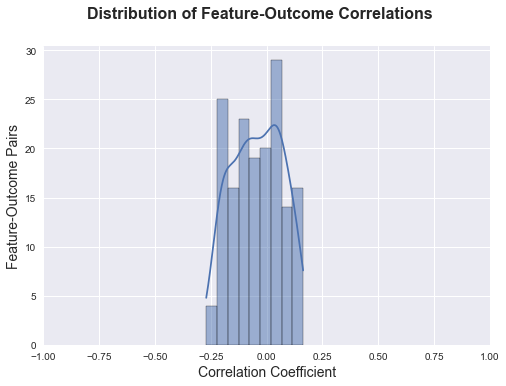

In [87]:
sns.histplot(data=class_correlation.iloc[:-1], kde=True)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.xlim(-1,1)
plt.ylabel('Feature-Outcome Pairs', fontsize=14)
plt.suptitle('Distribution of Feature-Outcome Correlations', fontsize=16, fontweight='bold')
plt.savefig('feature_outcome_corr.jpg')

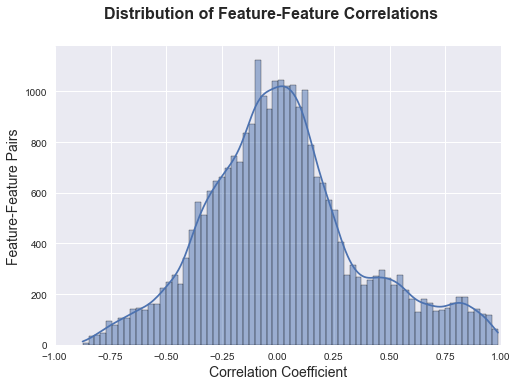

In [86]:
sns.histplot(data=corr_sorted.corr_coef, kde=True)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.xlim(-1,1)
plt.ylabel('Feature-Feature Pairs', fontsize=14)
plt.suptitle('Distribution of Feature-Feature Correlations', fontsize=16, fontweight='bold')
plt.savefig('feature_feature_corr.jpg')

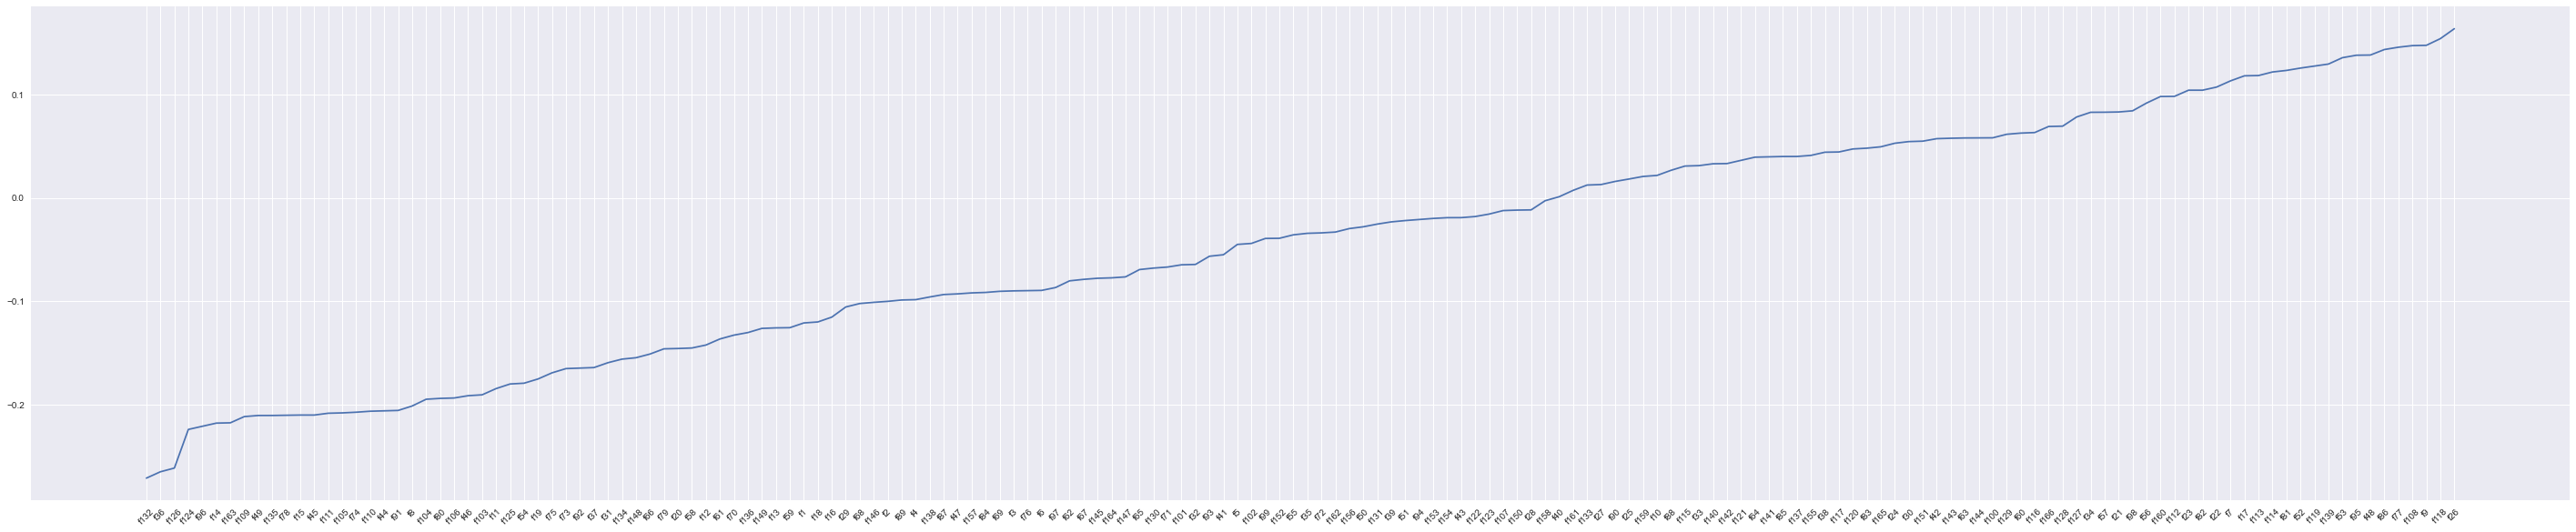

In [76]:
class_correlation_sorted = class_correlation.sort_values()
plt.figure(figsize=(50,10))
plt.xticks(rotation = 45)
plt.plot(class_correlation_sorted.iloc[:-1].index, class_correlation_sorted.iloc[:-1])

# Part 2: Analysis Description (1/2 - 2/3 pages)
**TODO** Write out description of analysis
- this will probably only happen once we're done

# Part 3: Model and Learning Method Properties (less than 1 page)
**TODO**: Expand on checkpoint 0 and just be clear about all the points listed below

## Model
### Responsible: Nate
- Go into more detail about the model (i.e. likelihood and prior).
- Show equations
- List assumptions
- " You should pay particular attention to describing any properties that you will reference in your performance hypothesis" (what does this mean?)

## Learning Method
### Responsible: Alex
- Describe parameters and how we will learn from them (what are the parameters logistic regression)
- No approximations needed (I think?) because we are only doing MAP estimates (maybe MLE). We are not going to find the posterior predictive

In [20]:
logreg = LogisticRegression(random_state=10, solver='sag')
start_time = time.time()
logreg.fit(X_std, y)
end_time = time.time()
print('Train Time: %0.3f seconds' % (end_time-start_time))

Train Time: 0.569 seconds


In [21]:
logreg.score(X_std, y)

0.939821130817038

In [22]:
param = {'C': np.logspace(-2,2,10)}
log_reg = LogisticRegression(random_state=10, solver='sag', max_iter=500)
clf = GridSearchCV(log_reg, param, return_train_score=True)

start_time = time.time()
clf.fit(X_std, y)
end_time = time.time()
print('Train Time: %0.3f seconds' % (end_time-start_time))

/Users/alexanderlobo/opt/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/alexanderlobo/opt/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/alexanderlobo/opt/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/alexanderlobo/opt/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max

Train Time: 50.228 seconds


In [23]:
results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.078812,0.001766,0.001781,0.000210,0.01,{'C': 0.01},0.764394,0.846212,0.860500,0.868082,...,0.840393,0.038682,7,0.902217,0.859769,0.894657,0.881584,0.868132,0.881272,0.015830
1,0.091341,0.009179,0.001648,0.000050,0.027826,{'C': 0.027825594022071243},0.754545,0.889394,0.802881,0.871873,...,0.841601,0.053953,6,0.913966,0.888763,0.938424,0.928003,0.910193,0.915870,0.016891
2,0.144985,0.031463,0.001686,0.000073,0.077426,{'C': 0.0774263682681127},0.745455,0.962879,0.778620,0.876422,...,0.856147,0.082235,4,0.922683,0.905249,0.948086,0.940508,0.921751,0.927655,0.015128
3,0.249074,0.059603,0.001943,0.000307,0.215443,{'C': 0.21544346900318834},0.764394,0.990152,0.752843,0.884003,...,0.864177,0.092607,2,0.928558,0.912829,0.960402,0.944297,0.926866,0.934590,0.016310
4,0.403186,0.110208,0.002247,0.000038,0.599484,{'C': 0.5994842503189409},0.791667,0.995455,0.731615,0.884003,...,0.868266,0.095824,1,0.935948,0.920788,0.971201,0.950739,0.932171,0.942170,0.017390
5,0.691472,0.167283,0.002257,0.000053,1.668101,{'C': 1.6681005372000592},0.789394,0.981061,0.708112,0.881729,...,0.860838,0.100218,3,0.946561,0.931969,0.973664,0.958318,0.937476,0.949598,0.014981
6,1.253053,0.169321,0.002118,0.000215,4.641589,{'C': 4.6415888336127775},0.775758,0.939394,0.683093,0.883245,...,0.844774,0.100860,5,0.954330,0.940875,0.979727,0.961728,0.946571,0.956646,0.013521
7,2.209249,0.050678,0.002204,0.000188,12.915497,{'C': 12.915496650148826},0.719697,0.893182,0.649735,0.884761,...,0.817345,0.112080,8,0.959068,0.947698,0.983895,0.964949,0.951307,0.961383,0.012757
8,2.391838,0.003284,0.002093,0.000227,35.938137,{'C': 35.93813663804626},0.698485,0.850000,0.616376,0.887794,...,0.797642,0.120481,9,0.962858,0.951677,0.988253,0.965896,0.954149,0.964567,0.012965
9,2.393086,0.005210,0.002051,0.000212,100.0,{'C': 100.0},0.693939,0.828030,0.606520,0.888552,...,0.790368,0.122489,10,0.964184,0.952814,0.990527,0.966654,0.954907,0.965817,0.013432


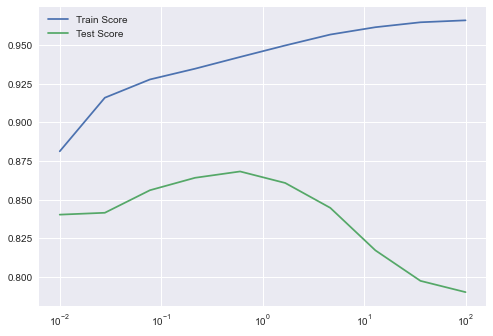

In [24]:
fig, ax = plt.subplots()
ax.plot(results.param_C, results.mean_train_score, label='Train Score')
ax.plot(results.param_C, results.mean_test_score, label='Test Score')
ax.set_xscale('log')
ax.legend()